<a href="https://colab.research.google.com/github/Ifusa/Autoencoders-tensorflow/blob/main/noisetest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

In [99]:
(x_train,_),(x_test, _) = mnist.load_data()

In [100]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [121]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [130]:
noisy_test = noise(x_test)
noisy_train = noise(x_train)

In [127]:
#defining callback class. Will stop training when loss becomes less or equal to 0.0045
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') <= 0.06):
      print("\nReached desired loss, Terminating training....\n")
      self.model.stop_training = True

callbacks = mycallback()

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [103]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [128]:
x = tf.keras.layers.Input(shape=(28, 28, 1))
encoder = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, 3, activation= 'relu', padding='same'),
   tf.keras.layers.MaxPool2D((2, 2), padding='same'),
   tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2, 2), padding='same')
])

#encoder.summary()

decoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same'),
    tf.keras.layers.Conv2DTranspose(32, 3, activation='relu', strides=2,  padding='same'),
    tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

 #decoder.summary()
l = encoder(x)
y = decoder(l)

model = tf.keras.Model(inputs = x, outputs = y)
model.summary()
model.compile(optimizer = "adam", loss = "binary_crossentropy")

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_44 (Sequential)   (None, 7, 7, 32)          9568      
_________________________________________________________________
sequential_45 (Sequential)   (None, 28, 28, 1)         18785     
Total params: 28,353
Trainable params: 28,353
Non-trainable params: 0
_________________________________________________________________


In [131]:
history = model.fit(noisy_train, x_train, batch_size=128, epochs=50, callbacks=[callbacks], shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1008 - val_loss: 0.0743
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0933 - val_loss: 0.0727
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0919 - val_loss: 0.0723
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0909 - val_loss: 0.0718
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0901 - val_loss: 0.0717
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0896 - val_loss: 0.0716
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0891 - val_loss: 0.0716
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0887 - val_loss: 0.0716
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0883 - val_loss: 0.0720
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0880 - val_loss: 0.0713

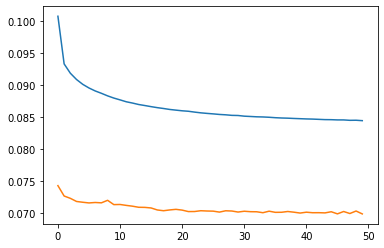

In [132]:
#visualizing training process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [133]:
dec_img = model.predict(x_test)
ndec_img = model.predict(noisy_test)

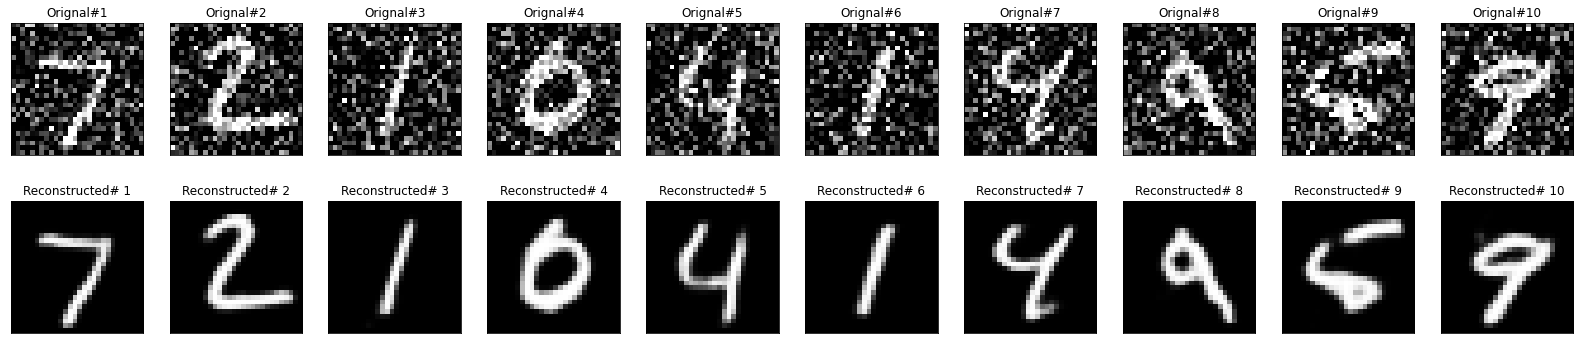

In [134]:
n=10
plt.figure(figsize=(28,6))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(noisy_test[i].reshape(28, 28))
  plt.title("Orignal#"+str(i+1))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(ndec_img[i].reshape(28, 28))
  plt.title("Reconstructed# "+str(i+1))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


plt.show()